<a href="https://colab.research.google.com/github/proyectosRVyderivados/ParteII/blob/main/EstrategiaCONDOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Instalamos librerías:
import numpy as np
import matplotlib.pyplot as plt  

#Estrategias con opciones
##Condor comprado
  * Compramos una CALL- PE: A
  * Vendemos una CALL- PE: B
  * Vendemos una CALL- PE: C
  * Compramos una CALL- PE: D
* Vendido:
  * Vendemos una CALL- PE: A
  * Compramos una CALL- PE: B
  * Compramos una CALL- PE: C
  * Vendemos una CALL- PE: D


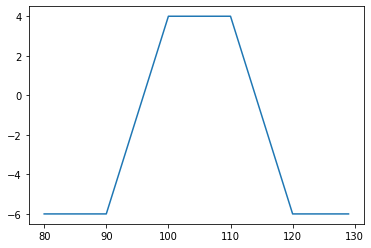

In [4]:
#estrategia CONDOR:

tipo_estrategia = "Comprado" #En este paso elegimos si la estrategia va a ser condor comprado o vendido

#Con la estrategia de cóndor comprado la secuencia de operaciones con opciones es: compra-venta-venta-compra de CALL
#en cambio con cóndor vendido la secuencia es: venta-compra-compra-venta de CALL
#establecemos el precio de ejercicio de las opciones:
peA = 90
peB = 100
peC = 110
peD = 120

#Establecemos la prima:
primaA = 8
primaB = 4
primaC = 2
primaD = 4

#y la número de contratos de opciones:
numA = 1
numB = 1
numC = 1
numD = 1

# La distancia A-B, B-C y C-D es la misma (tiene que haber simetría), por lo tanto definiremos esta distancia.
distancia = 10

#Todos los precios posibles, D>C>B>A
S = [*range(peA - distancia, peD + distancia)]
S

#Creo los vectores para guardar el valor de cada opción
BeneficioA = [0]*len(S)
BeneficioB = [0]*len(S)
BeneficioC = [0]*len(S)
BeneficioD = [0]*len(S)


#Si S < pe, el valor de la opción es negativo
#porque el tenedor de la opción perdería la prima
#En cambio si S > pe, el valor de la opción es: S - pe - prima

#opción A:
for i in range(0, len(S)):
  if S[i] < peA:
    BeneficioA[i] = 0 - primaA
  else:
    BeneficioA[i] = S[i] - peA - primaA

#opción B:
for i in range(0, len(S)):
  if S[i] < peB:
    BeneficioB[i] = 0 - primaB
  else:
    BeneficioB[i] = S[i] - peB - primaB

#opción C:
for i in range(0, len(S)):
  if S[i] < peC:
    BeneficioC[i] = 0 - primaC
  else:
    BeneficioC[i] = S[i] - peC - primaC

#opción D
for i in range(0, len(S)):
  if S[i] < peD:
    BeneficioD[i] = 0 - primaD
  else:
    BeneficioD[i] = S[i] - peD - primaD

#transformamos las listas en vectores. de lo contrario no podremos operar con estos valores
BeneficioA = np.array(BeneficioA)
BeneficioB = np.array(BeneficioB)
BeneficioC = np.array(BeneficioC)
BeneficioD = np.array(BeneficioD)

#para las opciones de venta se aplica la misma fórmula que en compra pero al revés. Sólo hay que multiplicar por -1
if tipo_estrategia == "Comprado":
  BeneficioA = BeneficioA * numA
  BeneficioB = BeneficioB * numB * -1
  BeneficioC = BeneficioC * numC * -1
  BeneficioD = BeneficioD * numD
  
else:
  BeneficioA = BeneficioA * numA * -1
  BeneficioB = BeneficioB * numB
  BeneficioC = BeneficioC * numC
  BeneficioD = BeneficioD * numD * -1

#Agregamos todos los vectores y obtenemos el beneficio:
BeneficioTOTAL = BeneficioA + BeneficioB + BeneficioC + BeneficioD

#lo representamos en un gráfico para poder observar a cada precio del activo 
#subyacente cual es el valor:
plt.plot(S, BeneficioTOTAL)  
plt.show()